<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/NND_Cla_MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias principales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reducción de dimensiones 
from sklearn.decomposition import PCA

# Métricas de rendimiento
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Artifial Neural Networds (ANN)
import tensorflow as tf
from tensorflow import keras


#**Activation functions**

In [ ]:
# Funciones de activación
def sigmoid(z):
    "sigmoid function"
    return 1 / (1 + np.exp(-z))

def relu(z):
    ""
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

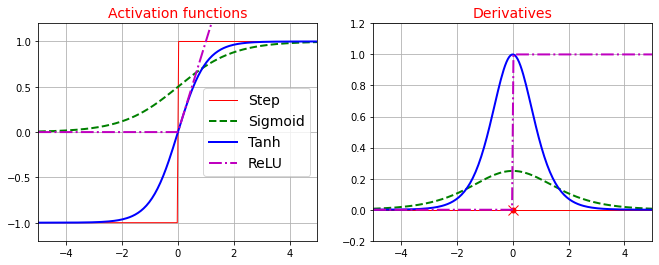

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", c='r', fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives",c='r', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

#**Load data**

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print('Training samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])
print('Validation samples: ', X_valid.shape[0])

Training samples:  55000
Test samples:  10000
Validation samples:  5000


In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

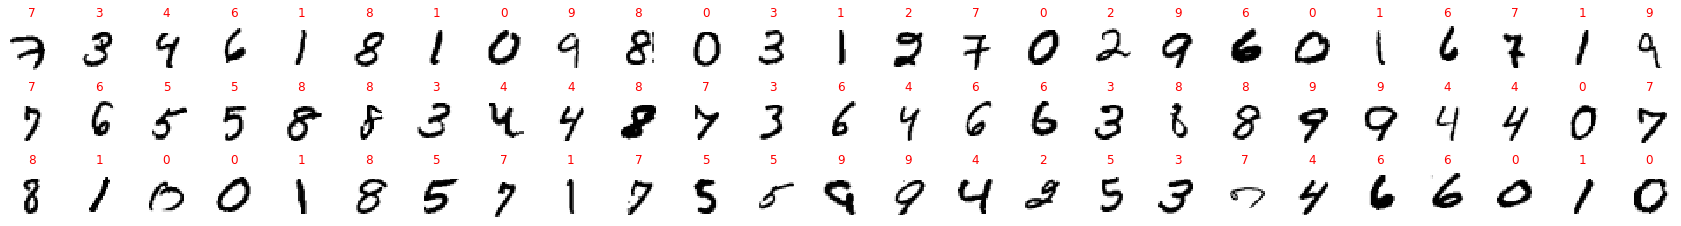

In [ ]:
n_rows = 3
n_cols = 25
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows): 
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12, c='r')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show() 

<class 'list'>


60000

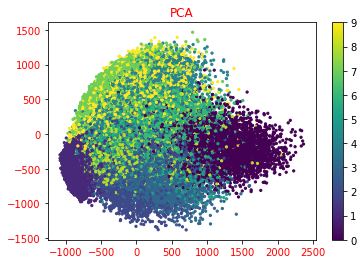

In [ ]:
X_flatten = []
for i in range(len(X_train_full)):
  X_flatten.append(X_train_full[i].flatten())

pca = PCA(n_components = 2)
tranformed_pca = pca.fit_transform(X_flatten)

plt.scatter(tranformed_pca[:,0], tranformed_pca[:,1], s=5, c=y_train_full)
plt.colorbar()
plt.title("PCA", c='r'); 
plt.xticks(c='r')
plt.yticks(c='r')

print(type(X_flatten))
len(X_flatten)


#**Deep Learning (sequential model)**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),                 # Input Layer (Para este caso únicamante convitio la matriz en un vector de caraterísticas)
    
    keras.layers.Dense(300, activation="relu",name='Hidden1'),  # Hidden layer 1
    keras.layers.Dense(100, activation="relu",name='Hidden2'),  # Hidden layer 2
    keras.layers.Dense(10, activation="softmax",name='Output')  # Output layer (la cual depende de la aplicación, para este caso son 10 porque es el número de labels)
])


In [ ]:
# Creación de la estrucutura interna de la Red
keras.backend.clear_session()  # Reiniciar todo lo que se ha utilizado 
#np.random.seed(42)            # Semillas fijas     
tf.random.set_seed(42)         # Modelo de inicialización de valores internos de la red neuronal

In [ ]:
# Impresión de la estrucura de la Red Neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


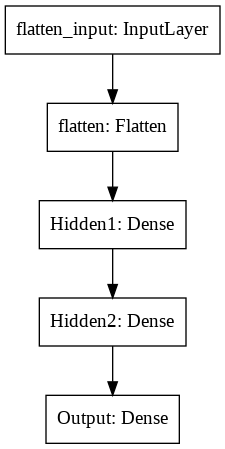

In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",    # Función de costo a derivar
              optimizer="sgd",                           # Optimización: gradiente descendente     
              metrics=["accuracy"])                      # Monitoriar la medida de desempeño (no lo deriva-> solo para ver la tarea final)   

history = model.fit(X_train,                             # Conjunto de entrenamiento
                    y_train,                             # Etiquetas 
                    epochs=30,                           # Epocas: número de veces que se ejecutaran el algoritmo de backpropagation 
                    validation_data=(X_valid, y_valid))  # Conjunto de validación (evaluar el desempeño)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0585 - accuracy: 0.7278 - val_loss: 0.3073 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3062 - accuracy: 0.9124 - val_loss: 0.2431 - val_accuracy: 0.9306
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2513 - accuracy: 0.9270 - val_loss: 0.2012 - val_accuracy: 0.9448
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2091 - accuracy: 0.9413 - val_loss: 0.1779 - val_accuracy: 0.9540
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1802 - accuracy: 0.9488 - val_loss: 0.1570 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1589 - accuracy: 0.9540 - val_loss: 0.1434 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9612 - val_loss: 0.1301 - val_accuracy:

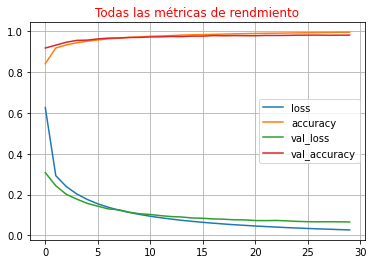

In [ ]:
hpd = pd.DataFrame(history.history)

hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

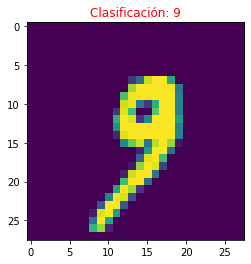

In [ ]:
def label_(numero_label):
  if numero_label == 0:
    label = 'Impar'
  if numero_label == 1:
    label = 'Par'
  return label

ii = 1000
pe = model.predict(X_test[ii][np.newaxis,:,:])
probabilidad = 'Clasificación: ' + str(pe.argmax())
plt.title(probabilidad, c='r')
plt.imshow(X_test[ii])
plt.show()


#**Deep Learning (functional model)**

In [ ]:
Q1 = 300 
Q2 = 100  
l1 = 1e-3 # Valor de regualización 1
l2 = 1e-3 # Valor de regualización 1

input = tf.keras.layers.Input(shape=(X_train.shape[1],X_train.shape[2]), name='Entrada')     # Entrada de imagenes normales
flatten = tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2]))(input)    # Capa de pre-procesamiento para la entrada 1

# Primera capa de de la Red Neuronal
h1 = tf.keras.layers.Dense(Q1,                                                                # Número de neuronas
                           activation='relu',                                                 # Función de activación
                           name='h1',                                                         # Nombre de la neurona
                           kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2)
                          )(flatten)

# Segunda capa de de la Red Neuronal
h2 = tf.keras.layers.Dense(Q2,                                                                # Número de neuronas
                           activation='relu',                                                 # Función de activación
                           name='h2',                                                         # Nombre de la neurona
                           kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2)
                          )(h1)

output = tf.keras.layers.Dense(10,activation="softmax",name='outAMC')(h2)                     # Salida multiclase (se escoge una sotfmax para múlticlase)

model_fun = tf.keras.Model(inputs=input, outputs=output)
model_fun.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 300)               235500    
_________________________________________________________________
h2 (Dense)                   (None, 100)               30100     
_________________________________________________________________
outAMC (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento y compilación de la Red Neuronal
model_fun.compile(loss=["sparse_categorical_crossentropy",tf.keras.losses.BinaryCrossentropy()], # Tipo de función de costo: custom_loss(), custom_loss(), "sparse_categorical_crossentropy"
                  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),                         # Sintonización del optimizador 
                  metrics=["accuracy"]                                                           # Métrica de seguimiento: f1, precision, recall, crossentropy
                  ) 


In [ ]:
history = model_fun.fit(X_train, y_train,                   # Conjunto de entrenamiento
                        epochs=30,                         # Número de epocas
                        batch_size=32,                     # Número de lotes: 32, 64, 128, 256
                        validation_data=(X_valid, y_valid) # Selección del conjunto de validación
                        )


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 13.1051 - accuracy: 0.3142 - val_loss: 11.8925 - val_accuracy: 0.7788
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 11.6012 - accuracy: 0.7994 - val_loss: 10.8752 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 10.7194 - accuracy: 0.8478 - val_loss: 10.2289 - val_accuracy: 0.8690
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 10.1047 - accuracy: 0.8682 - val_loss: 9.6855 - val_accuracy: 0.8860
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 9.5778 - accuracy: 0.8761 - val_loss: 9.1871 - val_accuracy: 0.8928
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 9.0888 - accuracy: 0.8848 - val_loss: 8.7161 - val_accuracy: 0.8962
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 8.6194 - accuracy: 0.8920 - val_loss: 8.2653 - val_ac

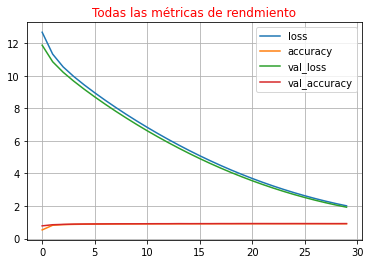

In [ ]:
hpd = pd.DataFrame(history.history)

hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

In [ ]:
model_PCA = tf.keras.Model(inputs=input, outputs=model_fun.get_layer('h2').output)
tf.keras.utils.plot_model(model_PCA)
ReductionDimension_PCA = model_PCA.predict(X_train)

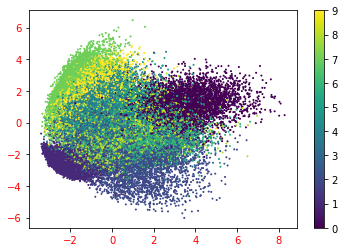

In [ ]:
pca = PCA(n_components = 2)

tranformed_pca = pca.fit_transform(ReductionDimension_PCA)

plt.figure()
plt.scatter(tranformed_pca[:,0], tranformed_pca[:,1], s=1, c=y_train)
plt.colorbar()
plt.xticks(c='r')
plt.yticks(c='r')
plt.show()

In [ ]:
pred_ = np.round(model_fun.predict(X_test))
pred_NN = np.array([x.argmax() for x in pred_])

In [ ]:
print("Accuracy :", accuracy_score(y_test, pred_NN))
print(confusion_matrix(list(y_test), list(pred_NN)))
print(classification_report(y_test, pred_NN, target_names=class_names))

Accuracy : 0.8681
[[ 973    0    0    0    0    2    3    1    1    0]
 [  26 1097    2    2    0    1    3    0    4    0]
 [ 127    4  854    4    5    0    8   11   17    2]
 [ 103    0   10  862    0   19    1    8    7    0]
 [  91    0    1    0  856    0    8    1    2   23]
 [ 133    2    2   33    2  698    9    4    6    3]
 [  69    3    3    0    7    6  870    0    0    0]
 [  89    7   14    0    4    0    0  905    0    9]
 [ 191    5    1   11    5   11    7    6  734    3]
 [ 142    2    0    5   20    0    0    7    1  832]]
              precision    recall  f1-score   support

           0       0.50      0.99      0.67       980
           1       0.98      0.97      0.97      1135
           2       0.96      0.83      0.89      1032
           3       0.94      0.85      0.89      1010
           4       0.95      0.87      0.91       982
           5       0.95      0.78      0.86       892
           6       0.96      0.91      0.93       958
           7      